In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import codecs

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Loading helpers, help from https://github.com/Ghosh4AI/Data-Processors/tree/master/MNIST
def get_int(b):
    return int(codecs.encode(b, 'hex'), 16)

def readImgs(filename):
    with open (filename, 'rb') as f:
        data = f.read()
        dtype = get_int(data[:4])
        length = get_int(data[4:8])
        
#         if (dtype == 2051):
        # images
        nrows = get_int(data[8:12])
        ncols = get_int(data[12:16])
        p = np.frombuffer(data, dtype = np.uint8, offset=16)
        p = np.reshape(p, (length, nrows, ncols))
    return p
    
def readLabels(filename):
    with open (filename, 'rb') as f:
        data = f.read()
        dtype = get_int(data[:4])
        length = get_int(data[4:8])
        
#         if (dtype == 2049):
        # labels
        p = np.frombuffer(data, dtype = np.uint8, offset=8)
        p = p.reshape(length)
    return p

In [3]:
# Read the datasets
files = ['../data/train-images-idx3-ubyte', 
         '../data/train-labels-idx1-ubyte', 
         '../data/t10k-images-idx3-ubyte', 
         '../data/t10k-labels-idx1-ubyte']

train_imgs_display = readImgs(files[0])
train_labels = readLabels(files[1])
test_imgs_display = readImgs(files[2])
test_labels = readLabels(files[3])

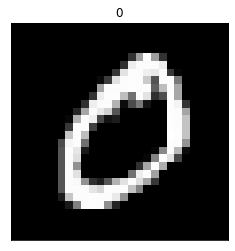

In [4]:
# test that loading was correct
i = 1
plt.imshow(train_imgs_display[i], cmap="gray"), plt.title('%d' % train_labels[i])
plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
# Preprocess the data for ML use
shape_train = np.shape(train_imgs_display)
shape_test = np.shape(test_imgs_display)

train_imgs = np.reshape(train_imgs_display, (shape_train[0], shape_train[1]*shape_train[2]))
test_imgs = np.reshape(test_imgs_display, (shape_test[0], shape_test[1]*shape_test[2]))

In [6]:
def performanceMetrics(labels, prediction):
    # accuracy
    acc = accuracy_score(labels, prediction)
    
    # Confusion Matrix
    conf = confusion_matrix(labels, prediction)

    plt.figure()
    plt.title("Accuracy: " + str(acc))
    plt.imshow(conf)
    plt.show()

In [ ]:
# Test 1. Simple SVM

clf = svm.SVC(kernel='linear', C=0.01)
clf.fit(train_imgs, train_labels)

performanceMetrics(test_labels, clf.predict(test_images))

In [ ]:
# Test 2. Simple 2 layer fully connected NN

In [ ]:
# Test 3. CNN with max pooling and a fully connected layer